In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales = pd.read_csv('SalesData.csv')
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AccountId           3709 non-null   int64  
 1   AccountName         3709 non-null   object 
 2   Region              3709 non-null   object 
 3   Division            3709 non-null   object 
 4   City                3709 non-null   object 
 5   State               3709 non-null   object 
 6   Tier                3709 non-null   object 
 7   Month               3709 non-null   object 
 8   Sales2015           3709 non-null   float64
 9   Sales2016           3709 non-null   float64
 10  Units2015           3709 non-null   float64
 11  Units2016           3709 non-null   float64
 12  TargetAchevied2015  3709 non-null   float64
 13  TargetAchevied2016  3709 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 405.8+ KB


In [4]:
sales.isnull().sum()

AccountId             0
AccountName           0
Region                0
Division              0
City                  0
State                 0
Tier                  0
Month                 0
Sales2015             0
Sales2016             0
Units2015             0
Units2016             0
TargetAchevied2015    0
TargetAchevied2016    0
dtype: int64

### 1. Compare Sales by region for 2016 with 2015 using bar chart

<AxesSubplot: xlabel='Region'>

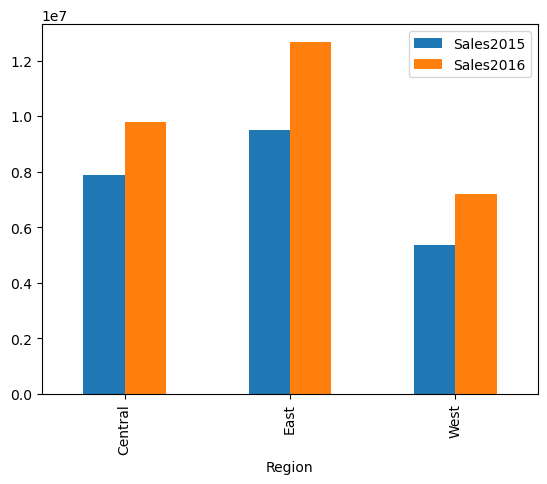

In [5]:
df = sales.groupby('Region').agg({'Sales2015': 'sum', 'Sales2016': 'sum'})
df.plot(kind='bar')

### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

array([<AxesSubplot: ylabel='Sales2016'>], dtype=object)

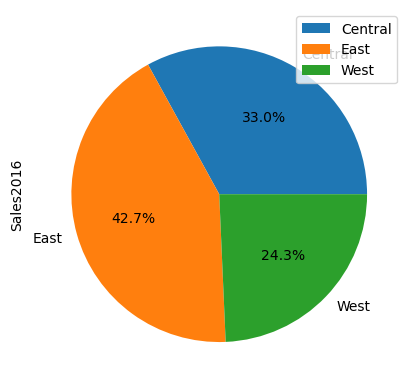

In [6]:
df = sales.groupby('Region').agg({'Sales2016':'sum'})
df.plot(kind='pie',subplots=True,autopct='%1.1f%%')


### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [7]:
sales_by_region_tier = sales.groupby(['Region', 'Tier']).agg({'Sales2015': 'sum', 'Sales2016': 'sum'})

<AxesSubplot: xlabel='Region,Tier'>

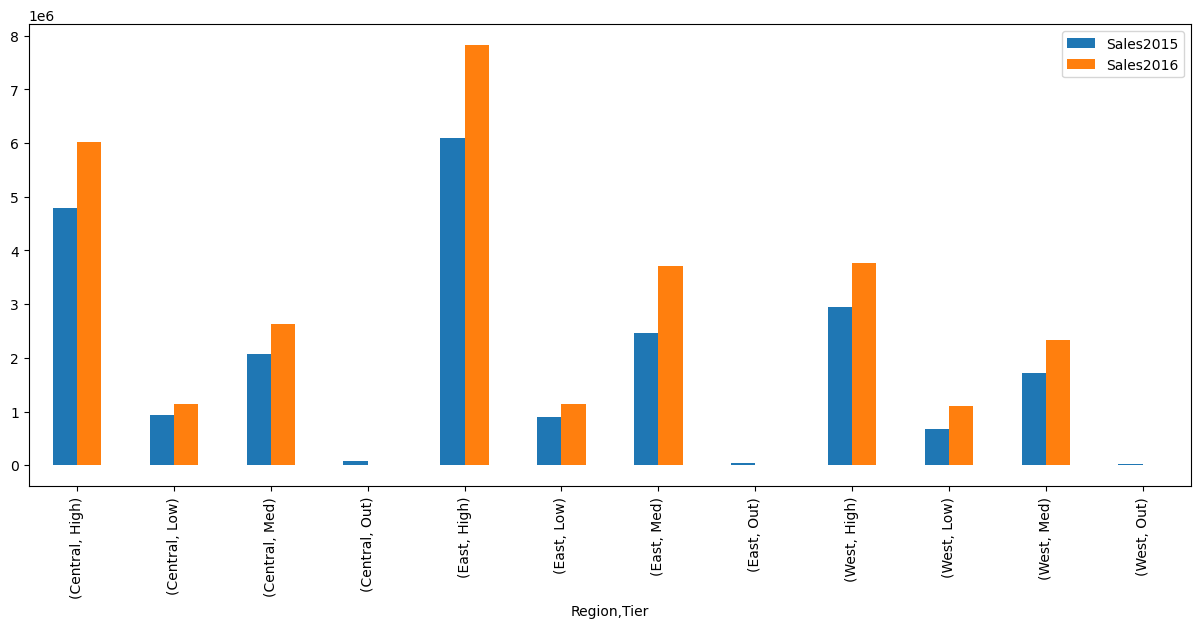

In [8]:
sales_by_region_tier.plot.bar(figsize=(15,6))

### 4. In East region, which state registered a decline in 2016 as compared to 2015?


<AxesSubplot: xlabel='Region,State'>

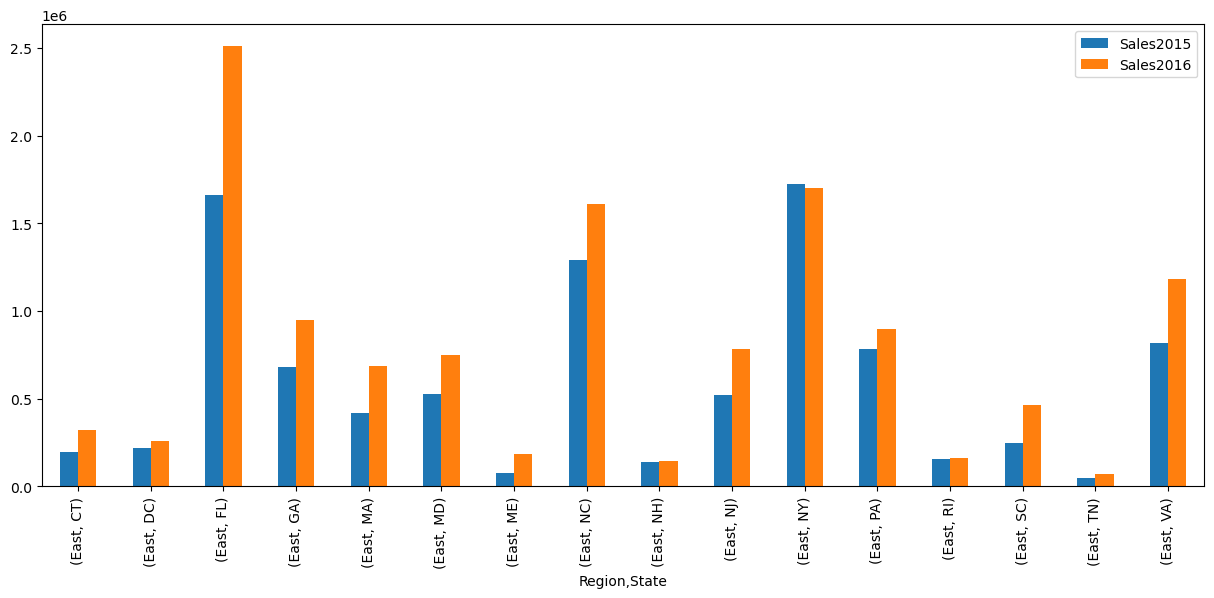

In [9]:
(sales[sales.Region=='East'].groupby(['Region','State'])).agg({'Sales2015': 'sum', 'Sales2016': 'sum'}).plot.bar(figsize=(15,6))

### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?


<AxesSubplot: xlabel='Division'>

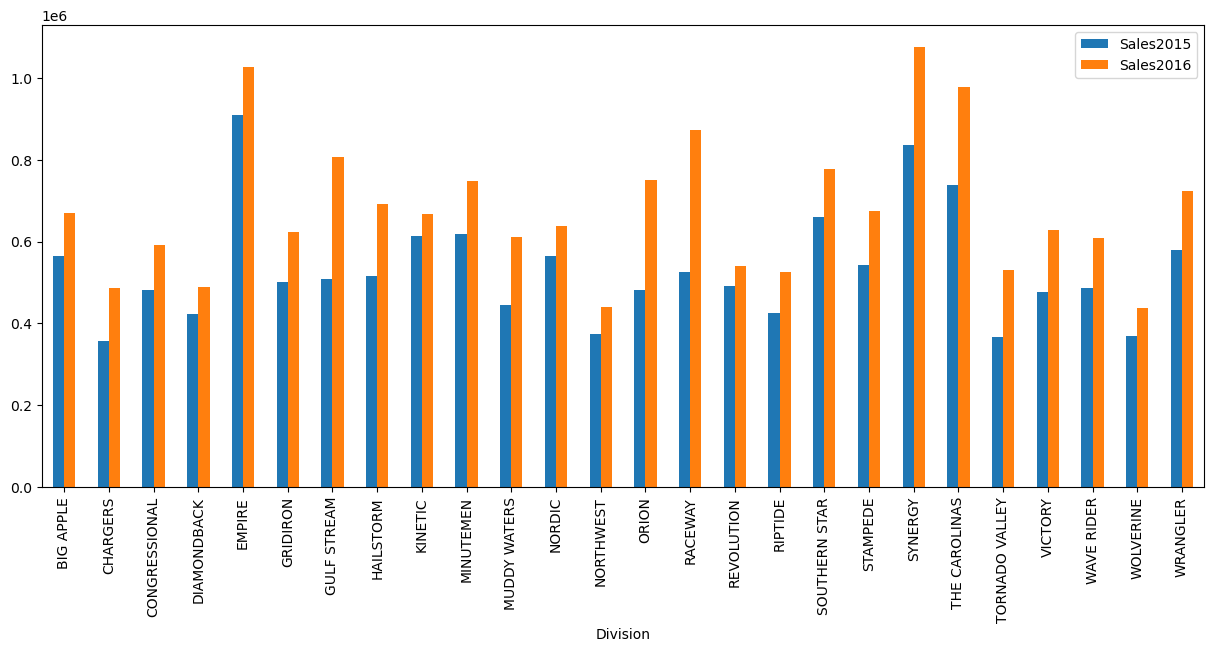

In [10]:
df = sales[sales.Tier=='High']
df.groupby('Division').agg({'Sales2015':'sum','Sales2016':'sum'}).plot.bar(figsize=(15,6))

<h3>6. Create a new column Qtr using numpy.where() or any suitable utility in the imported
dataset. The Quarters are based on months and defined as -<br>
• Jan - Mar : Q1<br>
• Apr - Jun : Q2<br>
• Jul - Sep : Q3<br>
• Oct - Dec : Q4</h3>

In [11]:
sales

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48


In [12]:
month_to_qtr = {'Jan':'Q1', 'Feb':'Q1', 'Mar':'Q1',
                'Apr':'Q2', 'May':'Q2', 'Jun':'Q2',
                'Jul':'Q3', 'Aug':'Q3', 'Sep':'Q3',
                'Oct':'Q4', 'Nov':'Q4', 'Dec':'Q4'}

# Use numpy.where() to create a new column "Qtr" based on the "Month" column
sales['Qtr'] = np.where(sales['Month'].isin(month_to_qtr.keys()), sales['Month'].map(month_to_qtr), 'Unknown')


<AxesSubplot: xlabel='Qtr'>

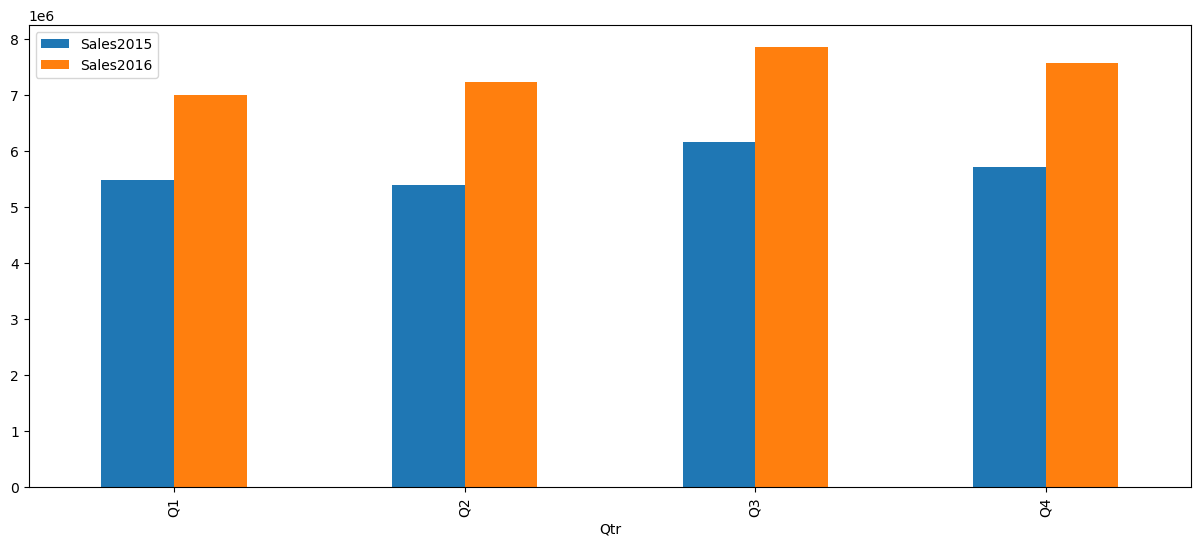

In [13]:
sales.groupby('Qtr').agg({'Sales2015':'sum','Sales2016':'sum'}).plot.bar(figsize=(15,6))

### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

In [14]:
qtrwise = sales.groupby(["Qtr"])[["Sales2015","Sales2016"]].sum()
qtrwise

,Sales2015,Sales2016
Qtr,,
Q1,5.485800e+06,6.997953e+06
Q2,5.390862e+06,7.237361e+06
Q3,6.164094e+06,7.861546e+06
Q4,5.713634e+06,7.567868e+06


<AxesSubplot: xlabel='Qtr'>

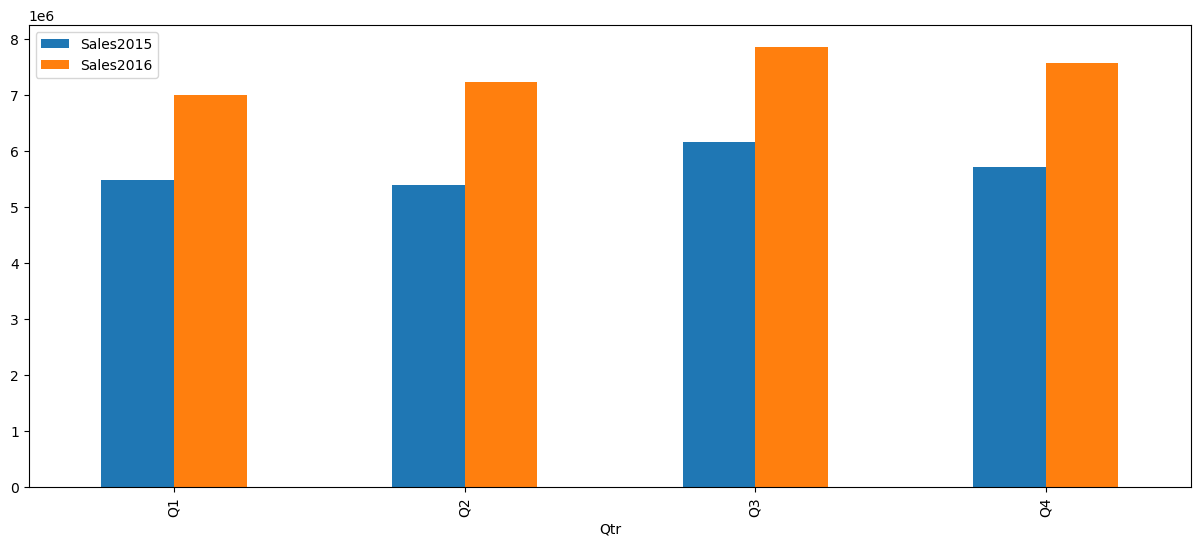

In [15]:
qtrwise.plot.bar(figsize=(15,6))

### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.


In [16]:
qtrtier = sales[sales['Tier']!='Out']
qtrtier = qtrtier.groupby(["Tier","Qtr"])[["Sales2016"]].sum()
qtrtier = qtrtier.round(decimals=0)
qtrtier = qtrtier.stack() # long to wide data
qtrtier = qtrtier.unstack(level=0)
qtrtier = qtrtier.T
qtrtier

Qtr,Q1,Q2,Q3,Q4
,Sales2016,Sales2016,Sales2016,Sales2016
Tier,,,,
High,3867719.0,4130953.0,4872559.0,4740002.0
Low,948833.0,890595.0,795178.0,742659.0
Med,2181402.0,2215814.0,2197058.0,2085207.0


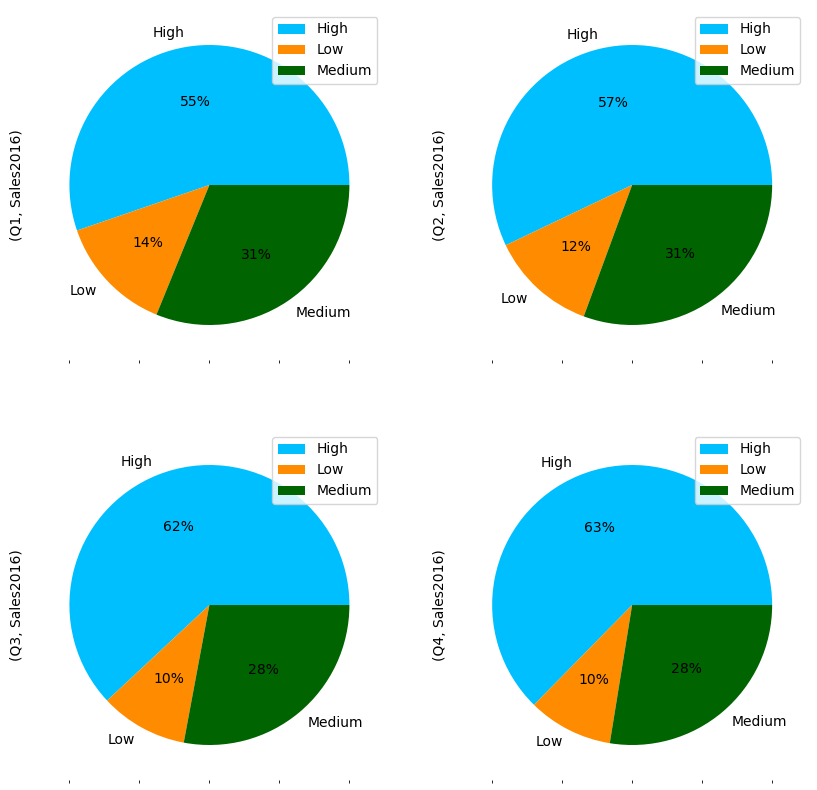

In [17]:
pielabels = ['High', 'Low', 'Medium','High']
qtrtier.plot(kind='pie', 
            labels=pielabels, 
            colors=['deepskyblue', 'darkorange', 'darkgreen'],
            autopct='%1.0f%%',
            fontsize=10,
            subplots='true',
            layout=(2,2), #to get a grid
            figsize=(10,10))
plt.show()